<a href="https://colab.research.google.com/github/shirleyrutgers/GIS/blob/main/PS0_FV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ps0: think about data to answer your questions; make 1st map; due sep11
 [version: Friday 5th September, 2025 09:09]
 [upto 3 points of extra credit]
 getting to know your data takes time! value your time! and gure out data youll use in this class asap !!! producing maps is fast; but
 data management is 20-80% of time !!!
 1. think hard about data (and U/A or level of analysis) youll use in your career otherwise youll waste 50+ hours!! and write
 couple sentences/paragraphs about the data and variables you want to use to answer your research questions
 2. get your own GIS data (shape le); if you do not have dataset, search on the internet for a shape le, say for NJ counties: NJ
 counties, shape le and/or email listserv for help
 3. load the data into python, and produce a map (and submit ps as per directions below)

 Professor's comments for PS0 and my responses inline>



#Continuation of PS5 Data Visualization
https://github.com/shirleyrutgers/DataVis/blob/main/PS5.ipynb

##Research Topic, Research Question, Hypothesis and Variables

###Research Topic:
The Relationship Between County GDP, Industry Structure, and Business Formation in New Jersey

###Research Question:
Do counties in New Jersey with higher GDP levels and stronger private industry presence show greater levels of business formation?

###Hypothesis:
Counties with higher GDP and stronger concentrations of private-sector employment—measured by Location Quotients (LQ)—will have a higher number of business applications. Additionally, areas with stronger performance in key sectors like education and health services may also support more entrepreneurship, while counties with lower private-sector presence may benefit from targeted support.

###Key Variables:

- Business Applications (BA2023): Dependent variable – represents entrepreneurship activity
- Gross Domestic Product (GDP): Independent variable – shows overall economic strength
- GDP per Capita: Economic capacity per person
- Unemployment Rate: Indicator of economic stress
- Median Income: Control for income levels
- Location Quotient – Total Private Industry (LQ): Measures private-sector concentration vs. national average
- Location Quotient – Education & Health Services: Shows specialization in a key industry with potential for business growth

This study uses multiple datasets to explore how economic conditions, sector strength, and income levels influence business formation, helping identify counties that could benefit most from entrepreneurship support programs.

#Section I. Instalations

In [ ]:
%%capture
#!pip install geopandas #==1.0.1
!pip install mapclassify #sometimes have to install library which you get from https://pypi.org/


In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

import seaborn as sns

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [ ]:
#!python --version
gpd.__version__

'1.1.1'

#Section II. Map area of Interest

In [ ]:
#link from drive, I have here the NJ shapefile zip> https://drive.google.com/file/d/166bfglrBJcu79edOYl56OQyOdLcb63IU/view?usp=sharing
#Link of my drive> https://drive.google.com/file/d/166bfglrBJcu79edOYl56OQyOdLcb63IU/view?usp=drive_link
#Hint> drive link has long format (https://drive.google.com/file/d/.../view). I have to change into this this format:
#https://docs.google.com/uc?id=ID_DEL_ARCHIVO&export=download
# El ID_DEL_ARCHIVO está en la URL de Drive después de file/d/ y antes de /view.
#My updated link https://docs.google.com/uc?id=166bfglrBJcu79edOYl56OQyOdLcb63IU&export=download

#Example from Professor code> nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
#Ref.> replicating the AOK code.
#Also read this how to upload a file into drive> https://theaok.github.io/generic/howToPutDataOnline.html

! wget -q -O nj-counties.zip https://docs.google.com/uc?id=166bfglrBJcu79edOYl56OQyOdLcb63IU&export=download #link from drive
# ! = run terminal command; wget = download; -q = quiet; -O = output name; saves file as nj-counties.zip; URL = direct download link

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); # open the zip file in read mode
zip_ref.extractall(); # extract all files into current folder
zip_ref.close() #just unzipping # close the zip file (good practice)
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC # read shapefile into GeoDataFrame; use exact shapefile name

<Axes: >

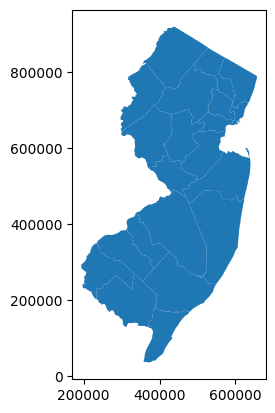

In [ ]:
#make the map
njC0.plot()